# <center>Clustering Analysis<center>

<p>Team Name: Data Dredgers
<p>Student Names: Christian Bankovic, Brian Britton, Davidson Rock

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

In [236]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

## Read Data

### Explanation of Columns:

`name` (`str`): Game name for parsing HowLongToBeat
- This is Steam's name for the game, and was used to compare Steam's database to HowLongToBeat's database.

`howlongtobeat` (`str`): Most similar game name found in HowLongToBeat database
- This was used when comparing Steam's database to HowLongToBeat's database.

`time_to_finish_h` (`str`): Time to finish a run
- How long, in hours, it takes to complete a single run.
- This is a string because some entries are `'No time registered yet'`.

`time_to_complete_h` (`str`): Time to complete 100% achievements
- How long, in hours, it takes to complete the game with 100% achievements.
- This is a string because some entries are `'No time registered yet'`.

`similarity` (`float`): Similarity relation between games name and the closest game in HowLongToBeat database
- This was used when comparing Steam's database to HowLongToBeat's database.

`perfect_match` (`str`): Values above 0.85 are considered perfect
- This was used when comparing Steam's database to HowLongToBeat's database.
- Values are `'Exact'`, `'Non Exact'`, or `nan`.

`name_steam_games_database` (`str`): Game as found in column 1
- This is Steam's name for the game.

`appid_steam_games` (`int`): AppID from Steam Games page
- Steam's AppID.

`appid_steam` (`float`): AppID from Steam database (may differ from previous)
- Steam's... AppID?

`name_steam_database` (`str`): Games name as it is found in Steam database
- Steam's... name for the game?

`genre` (`str`): Games genre
- The genres of each game, separated by commas.

`positive_votes` (`int`): Number of positives votes

`negative_votes` (`int`): Number of negatives votes

`developer` (`str`): Games developer

`publisher` (`str`): Games Publisher to date

`tags` (`str`): Games tags
- The tags for each game, separated by commas.

`finished` (`str`): Is it 100% completed in this user account
- Whether a game is finished or is still a WIP.
- Values here are either `nan` or `'X'`.

`played_time` (`float`): Total played time
- Is this a total value or an average value??? Probably an average, maybe.

`release` (`str`): Games release date

`minimun_requirements` (`str`): PC minimun requierements
- The person typing this doesn't know how to spell, lol.

`recommended_requirements` (`str`): PC recommended requierements
- The person typing this doesn't know how to spell, lol.

`removed_game` (`str`): Is it removed from Steam store
- Values here are either `nan` or `'X'`.

`positive_rating` (`float`): Percetage of positive votes
- The person typing this doesn't know how to spell, lol.

`total_votes` (`int`): Sum of positive and negative votes

`achievements` (`str`): Does the game have achievements in it
- Values here are either `nan` or `'X'`.


<br>

---

### Columns we are using:
- `time_to_finish_h`
- `time_to_complete_h`
- `genre`
- `positive_votes`
- `negative_votes`
- `tags`
- `finished`
- `played_time`
- `removed_game`
- `positive_rating`
- `total_votes`
- `achievements`

In [237]:
# Download latest version
path = kagglehub.dataset_download("marcosparrasmolt/steam-library-metadata")
print("Path to dataset files:", path)
dataset_path = os.path.join(path, "Steam_Metadata_Full_marko_pakete.csv")
df = pd.read_csv(dataset_path)

df

Path to dataset files: C:\Users\chris\.cache\kagglehub\datasets\marcosparrasmolt\steam-library-metadata\versions\4


,name,howlongtobeat,time_to_finish_h,time_to_complete_h,similarity,perfect_match,name_steam_games_database,appid_steam_games,appid_steam,name_steam_database,...,tags,finished,played_time,release,minimun_requirements,recommended_requirements,removed_game,positive_rating,total_votes,achievements
0,Grand Theft Auto V,Grand Theft Auto V,32,81,1.00,Exact,Grand Theft Auto V,271590,362003.0,Grand Theft Auto V,...,"Open World, Action, Multiplayer, Crime, Automo...",NaN,139.0,13-Apr-2015,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating syst...,NaN,85.6,1508816,X
1,Monster Hunter Stories 2: Wings of Ruin,Monster Hunter Stories 2: Wings of Ruin,40,143,1.00,Exact,Monster Hunter Stories 2: Wings of Ruin,1277400,1277400.0,Monster Hunter Stories 2: Wings of Ruin,...,"RPG, Adventure, JRPG, Exploration, 3D, Cartoon...",X,137.0,08-Jul-2021,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating syst...,NaN,82.2,13970,X
2,ELDEN RING,Elden Ring,55,133,1.00,Exact,ELDEN RING,1245620,1245620.0,ELDEN RING,...,"Souls-like, Dark Fantasy, RPG, Open World, Dif...",X,122.0,24-Feb-2022,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating syst...,NaN,91.6,637890,X
3,Monster Hunter: World,Monster Hunter: World,48,396,1.00,Exact,Monster Hunter: World,582010,582010.0,Monster Hunter: World,...,"Co-op, Multiplayer, Action, Open World, RPG, T...",NaN,110.0,09-Aug-2018,Requires a 64-bit processor and operating syst...,Requires a 64-bit processor and operating syst...,NaN,86.0,373998,X
4,PAYDAY 2,Payday 2,25,465,1.00,Exact,PAYDAY 2,218620,218620.0,PAYDAY 2,...,"Co-op, Action, FPS, Heist, Looter Shooter, Mul...",NaN,96.0,13-Aug-2013,OS: Windows 7Processor: 2 GHz Intel Dual Core ...,OS: Windows 10Processor: 2.3 GHz Intel Quad Co...,NaN,89.6,611958,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,Idle,NaN,NaN,NaN,NaN,NaN,海贼王街机Idle,1962140,NaN,海贼王街机Idle,...,NaN,NaN,0.0,NaN,NaN,NaN,X,NaN,0,NaN
3169,Project Zero,Narcissu Zero,0,3,0.46,Non Exact,瘟疫清零计划 Project Zero,2088250,2088250.0,瘟疫清零计划 Project Zero,...,NaN,NaN,0.0,11-Sep-2022,OS: Window7\/8\/10Processor: Any typeGraphics:...,NaN,NaN,NaN,0,NaN
3170,() \/ Fall...in Love (Demo),reIterate(),2,4,0.18,Non Exact,秋色的記憶(體驗版) / Fall...in Love (Demo),890070,890070.0,秋色的記憶(體驗版) / Fall...in Love (Demo),...,"Free to Play, Adventure, Visual Novel, Otome, ...",NaN,0.0,26-Jul-2018,OS: Windows 7+Processor: Intel AtomMemory: 1 G...,NaN,NaN,92.7,151,NaN
3171,NaN,NaN,NaN,NaN,NaN,NaN,秦殇,970500,970500.0,秦殇 (Prince of Qin),...,"Action, RPG, Adventure, Action RPG, Party-Base...",NaN,0.0,10-Jan-2022,"OS: Windows7,windows10Processor: Intel Pentium...",OS:,NaN,76.8,1954,NaN


## Visual Exploration of Data

### Testing Stuff
This is just stuff I'm using to test with. - Christian

<Axes: >

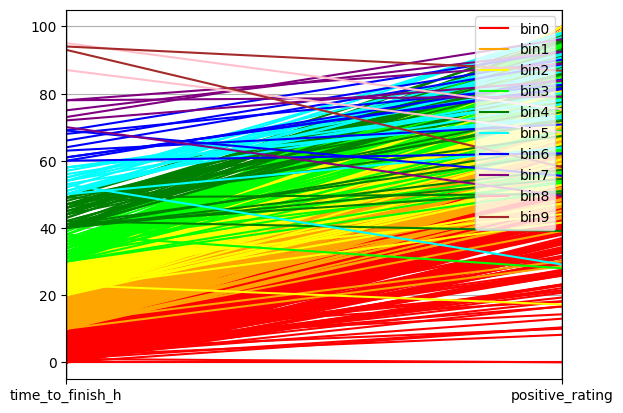

In [238]:
def binify(df: pd.DataFrame, bins: int, col_to_bin: str, min: int, max: int) -> pd.DataFrame:
    df_binned = df.copy()
    diff = max-min
    bin_range = diff/bins

    for i, row in df_binned.iterrows():
        if row[col_to_bin] == df_binned[col_to_bin].max():
            df_binned.at[i, 'bin'] = "bin"+(str)((int)(row[col_to_bin]//bin_range - 1))
        else:
            df_binned.at[i, 'bin'] = "bin"+(str)((int)(row[col_to_bin]//bin_range))
    return df_binned

# Python doesn't support overloading...
# def binify(df, bins, col_to_bin):
#     binify(df, bins, col_to_bin, df[col_to_bin].min(), df[col_to_bin].max())

def restrict(df, col_to_restrict, min, max):
    df = df[df[col_to_restrict] >= min]
    df = df[df[col_to_restrict] <= max]
    return df


# Only grab the time to finish (in hrs) and positive rating (0-100) columns
ttfh = df.filter(items=["time_to_finish_h", "positive_rating"])
# Remove bad entries (not registered or NaN)
ttfh = ttfh[ttfh["time_to_finish_h"] != "No time registered yet"]
ttfh = ttfh.dropna(ignore_index=True)
# Convert time_to_finish from string to int
ttfh["time_to_finish_h"] = ttfh["time_to_finish_h"].apply(lambda x: int(x))
# Remove outliers
mint = 0
maxt = 100


ttfh = restrict(ttfh, "time_to_finish_h", mint,maxt)
# Normalize data (min-max recommended)
# ttfh = (ttfh-ttfh.mean())/ttfh.std() # mean normalization
# ttfh=(ttfh-ttfh.min())/(ttfh.max()-ttfh.min()) # min-max normalization
# Bin data so we can better visualize the data
ttfh = binify(ttfh, 10, "time_to_finish_h", mint, maxt)

ttfh

# Histogram
# test = ttfh.hist(bins=10)
# plt.tight_layout()

# Plot as parallel coordinate plot
ttfh = ttfh.sort_values(by=["bin"]) # Sorts values so the bins show in color order
pd.plotting.parallel_coordinates(ttfh, "bin", color=('red', 'orange', 'yellow', 'lime', 'green', 'cyan', 'blue', 'purple', 'pink', 'brown'))

### Dataframe Cleanup

In [239]:
def normalize_minmax(df: np.DataFrame, min: int, max: int) -> np.DataFrame:
    #Create copy for min-max normalization
    df_norm = df.copy()
    #Normalizes filtered copy of df_norm (this function only works with int)
    for col in df_norm:
        # print(type(col), col)
        df_norm[col] = (df_norm[col] - df_norm[col].min())/(df_norm[col].max()-df_norm[col].min())*(max-min)+min
    return df_norm

def normalize_zscore(df: np.DataFrame) -> np.DataFrame:
    df_norm = df.copy() 
    for col in df_norm.columns:
        df_norm[col] = (df_norm[col] - df_norm[col].mean()) / df_norm[col].std()
    return df_norm

def snip_low(df: np.DataFrame, min: int) -> np.DataFrame:
    df_snip = df.copy()
    for col in df_snip:
        df_snip = df_snip[df_snip[col] > min]
    return df_snip

#filter out columns we want from dataset
df_filt = df.filter(items = ['time_to_finish_h', 'time_to_complete_h', 'genre',
                             'positive_votes', 'negative_votes', 'tags', 'finished', 'played_time',
                             'removed_game', 'positive_rating', 'total_votes', 'achievements'])

#remove unwanted values from some columns
df_filt = df_filt[df_filt['time_to_finish_h']  != 'No time registered yet']
df_filt = df_filt[df_filt['time_to_complete_h'] != 'No time registered yet']

#Change NA/NAN values to 0
df_filt = df_filt.fillna(0)

#Replace 'X' (meaning true) with 1
df_filt = df_filt.replace('X', 1)

#Convert number strings to int
df_filt['time_to_finish_h'] = df_filt['time_to_finish_h'].apply(lambda x: int(x))
df_filt['time_to_complete_h'] = df_filt['time_to_complete_h'].apply(lambda x: int(x))

# Trim some values to isolate desired attributes
df_filt = df_filt[df_filt['played_time'] > 0]
df_filt = df_filt[df_filt["positive_rating"] >= 90]

#Filter out columns that have names of genres and tags until figure out what to do with them
df_filt_exclude_col_w_string = df_filt.filter(items = ['time_to_finish_h', 'time_to_complete_h',
                                      'positive_votes', 'negative_votes',  'finished', 'played_time',
                                      'removed_game', 'positive_rating', 'total_votes', 'achievements'])

df_filt_copy_for_norm = normalize_minmax(df_filt_exclude_col_w_string,0,1)

C:\Users\chris\AppData\Local\Temp\ipykernel_41324\3802949126.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filt = df_filt.replace('X', 1)


### Histograms

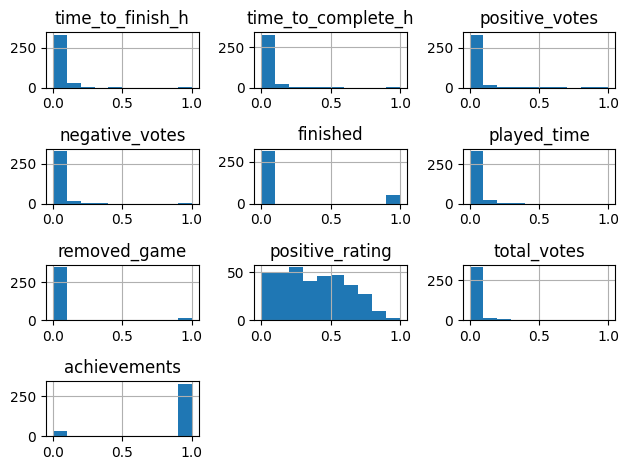

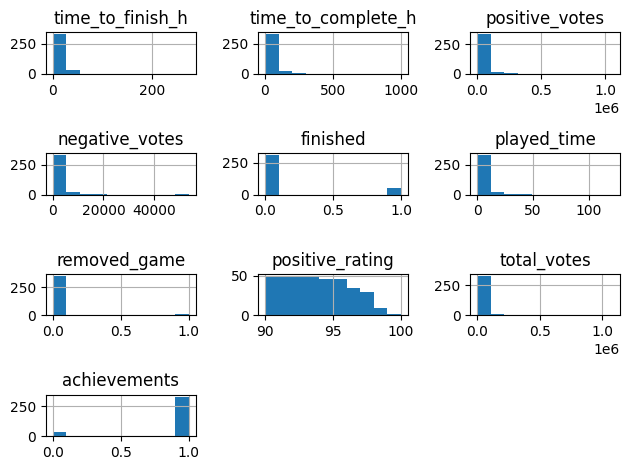

In [240]:
#Plots histogram with normalized data    
hist_norm = df_filt_copy_for_norm.hist(bins = 10)
plt.tight_layout()

#plot histogram with non-normalized data
hist = df_filt.hist(bins = 10)
plt.tight_layout()

### Distributions

### Box-Whisker Plots

C:\Users\chris\AppData\Local\Temp\ipykernel_41324\343638133.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_filt_boxplot.columns, rotation=45, ha='right')


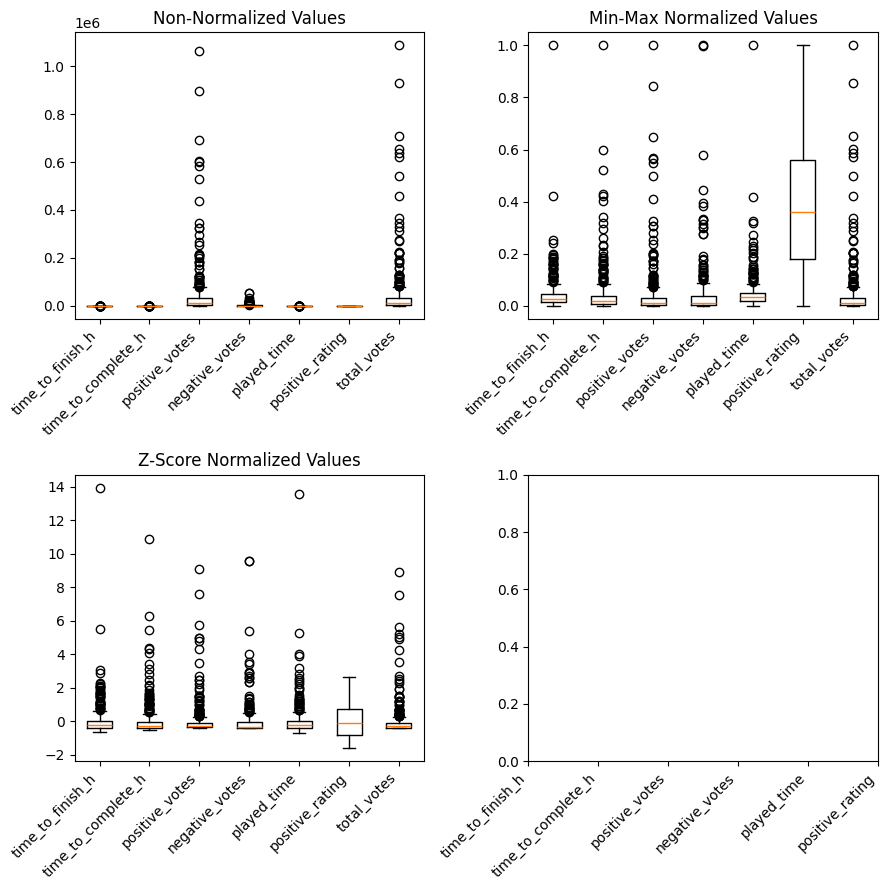

In [241]:
df_filt_boxplot = df_filt.filter(items=['time_to_finish_h', 'time_to_complete_h',
                                      'positive_votes', 'negative_votes', 'played_time',
                                      'positive_rating', 'total_votes'])
# df_filt_boxplot = snip_low(df_filt_boxplot,0) # clip the 0 values causing bias
df_filt_boxplot_normalized_minmax = normalize_minmax(df_filt_boxplot,0,1)
df_filt_boxplot_normalized_zscore = normalize_zscore(df_filt_boxplot)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

#Plots boxplot with non-normalized data (not useful)
axs[0][0].boxplot(df_filt_boxplot)
axs[0][0].set_title("Non-Normalized Values")

#Plots boxplot with min-max normalized data
axs[0][1].boxplot(df_filt_boxplot_normalized_minmax)
axs[0][1].set_title("Min-Max Normalized Values")

#Plots boxplot with z-score normalized data
axs[1][0].boxplot(df_filt_boxplot_normalized_zscore)
axs[1][0].set_title("Z-Score Normalized Values")

#Format graphs
for subaxs in axs:
    for ax in subaxs:
        ax.set_xticklabels(df_filt_boxplot.columns, rotation=45, ha='right')

plt.tight_layout()

### Violin Plots

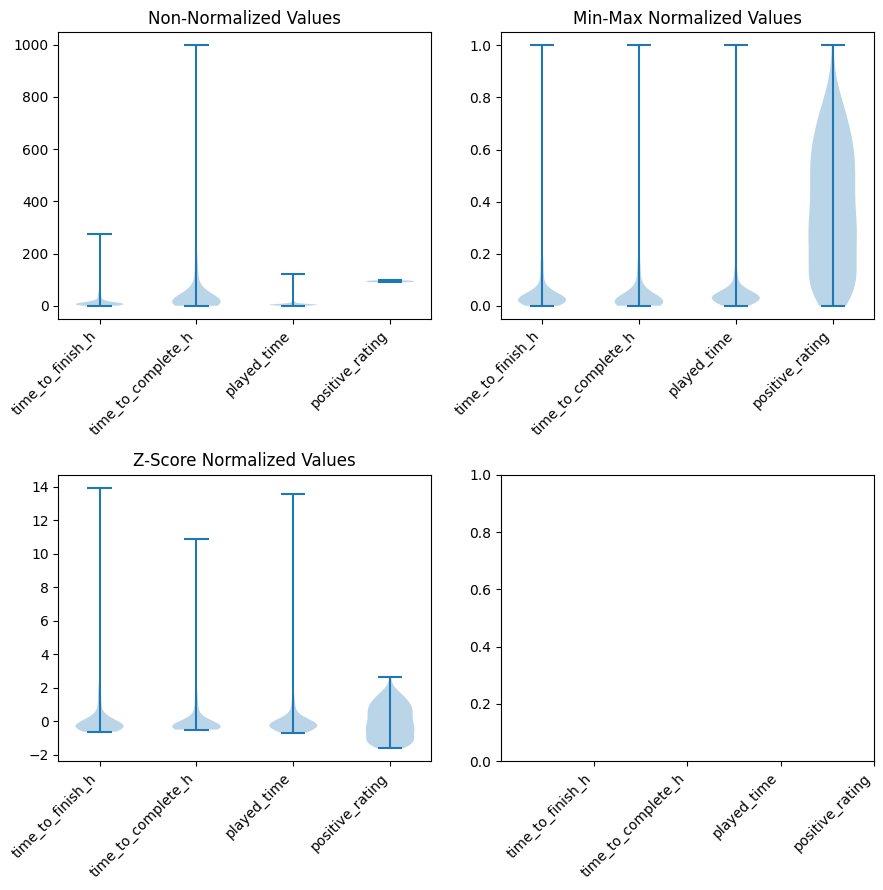

In [242]:
df_filt_violinplot = df_filt.filter(items = ['time_to_finish_h', 'time_to_complete_h', 'played_time', 'positive_rating'])
# df_filt_violinplot = snip_low(df_filt_violinplot,15) # clip the 0 values causing bias
df_filt_violinplot_normalized_minmax = normalize_minmax(df_filt_violinplot,0,1)
df_filt_violinplot_normalized_zscore = normalize_zscore(df_filt_violinplot)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 9))

#Plots voilinplot with non-normalized data
axs[0][0].violinplot(df_filt_violinplot)
axs[0][0].set_title("Non-Normalized Values")

#Plots voilinplot with min-max normalized data
axs[0][1].violinplot(df_filt_violinplot_normalized_minmax)
axs[0][1].set_title("Min-Max Normalized Values")

#Plots voilinplot with z-score normalized data
axs[1][0].violinplot(df_filt_violinplot_normalized_zscore)
axs[1][0].set_title("Z-Score Normalized Values")

#Format graphs 
for subaxs in axs:
    for ax in subaxs:
        ax.set_xticks([y + 1 for y in range(len(df_filt_violinplot.columns))],
              labels=df_filt_violinplot.columns,
              rotation=45, ha='right')

plt.tight_layout()

## Testing

<Axes: >

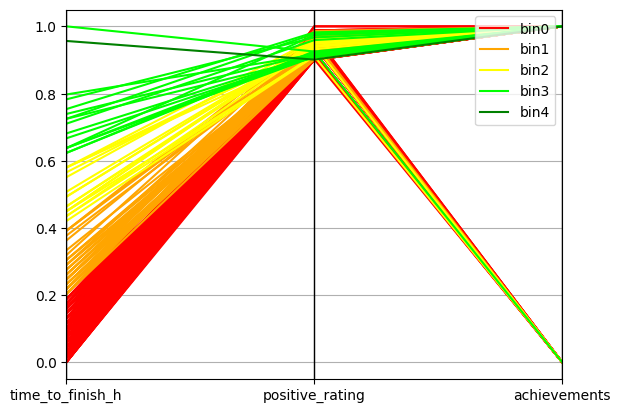

In [270]:
cols = ["time_to_finish_h", "positive_rating", "achievements"]
df_binned = df_filt.filter(items=cols)
df_binned = df_binned[df_binned[cols[0]] <= 100]
df_binned[cols[0]] = (df_binned[cols[0]] - 0)/(df_binned[cols[0]].max() - 0)
df_binned[cols[1]] = (df_binned[cols[1]] - 0)/(df_binned[cols[1]].max() - 0)
df_binned[cols[2]] = (df_binned[cols[2]] - df_binned[cols[2]].min())/(df_binned[cols[2]].max() - df_binned[cols[2]].min())
# df_binned = normalize_minmax(df_binned,0,1)
df_binned = binify(df_binned, 5, 'time_to_finish_h', df_binned['time_to_finish_h'].min(), df_binned['time_to_finish_h'].max())

# Plot as parallel coordinate plot
df_binned = df_binned.sort_values(by=["bin"]) # Sorts values so the bins show in color order
pd.plotting.parallel_coordinates(df_binned, "bin", color=('red', 'orange', 'yellow', 'lime', 'green', 'cyan', 'blue', 'purple', 'pink', 'brown'))

## Data Quality & Cleaning

Instruction: Add a comment for each method

## Handling Redundancy

### X-square Test

### Correlation Analysis

### Visual Exploration (scatter-plot matrix)

## Dimensionality Reduction

### PCA

## Discretization

### Histogram of Discretized Attribute

### X-square Test of Discretized Attributes

### Visual Exploration (scatter-plot matrix) of Discretized Attributes

## Feature Selection/Generation

### Select Features

### Generate Features

# Generate Clusters

## K-means

## Hierarchical

# Evaluation of Clusters

See instructions provided in the report template

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

https://www.geeksforgeeks.org/python/data-normalization-with-pandas/

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
